# Linear Regression | Pipeline | Save and Load a trained Model | Model Evaluation

Linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression.

## Simple Linear Regression

Simple linear regression is an approach for predicting a response using a single feature. It is assumed that the two variables are linearly related. Hence, we try to find a linear function that predicts the response value(y) as accurately as possible as a function of the feature or independent variable(x).

The linear function can be represented as:
$$
y = mx + c
$$
Where:
- y is the response
- x is the feature
- m is the slope
- c is the intercept
- m and c are the coefficients of the model
  
The model is trained on a dataset with features(x) and target(y). It learns the values of coefficients m and c that minimize the difference between actual values in the dataset and predicted values by the model. The difference between actual values and predicted values is known as the cost function. The model optimizes the cost function using the gradient descent algorithm.




## Multiple Linear Regression

Multiple linear regression is an extension of simple linear regression as it takes more than one feature to predict the response. The linear function can be represented as:
$$
y = m1x1 + m2x2 + m3x3 + ... + c
$$
Where:
- y is the response
- x1, x2, x3, ... are the features
- m1, m2, m3, ... are the coefficients of the model
- c is the intercept
- m1, m2, m3, ... and c are the coefficients of the model

The model is trained on a dataset with features(x) and target(y). It learns the values of coefficients m1, m2, m3, ... and c that minimize the difference between actual values in the dataset and predicted values by the model. The difference between actual values and predicted values is known as the cost function. The model optimizes the cost function using the gradient descent algorithm.

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression

In [3]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


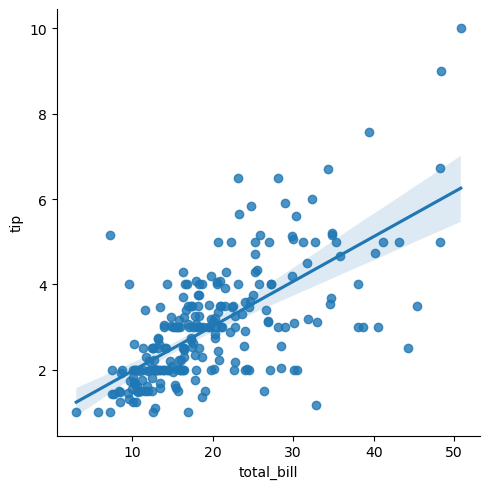

In [7]:
sns.lmplot(x='total_bill', y='tip', data=df)

In [10]:
# preprocess the data
scalar = StandardScaler()
df[['total_bill', 'tip']] = scalar.fit_transform(df[['total_bill', 'tip']])
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,-0.314711,-1.439947,Female,No,Sun,Dinner,2
1,-1.063235,-0.969205,Male,No,Sun,Dinner,3
2,0.137780,0.363356,Male,No,Sun,Dinner,3
3,0.438315,0.225754,Male,No,Sun,Dinner,2
4,0.540745,0.443020,Female,No,Sun,Dinner,4


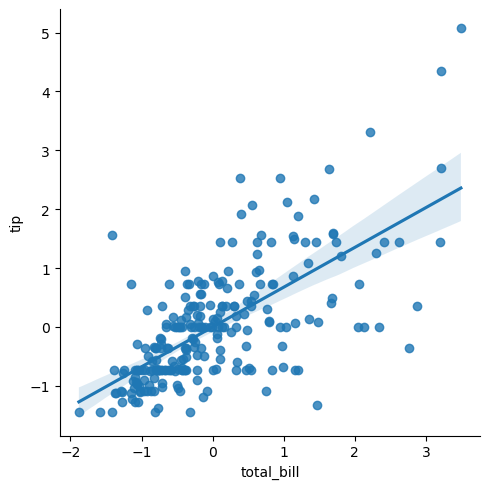

In [11]:
sns.lmplot(x='total_bill', y='tip', data=df)

In [ ]:
X = df[['total_bill']]
y = df['tip']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
y_pred = model.predict(X_test)
y_pred

array([ 0.03402197, -0.82196658,  0.40043156,  0.50423469, -0.49428952,
       -0.11548553,  0.70177051, -0.53457133, -0.35640177, -0.30992275,
       -0.08449952, -0.66703653, -0.67633233, -0.37964127, -0.72126205,
       -0.05738676, -0.05196421,  0.17036042, -0.22703517,  1.68944962,
        0.10141655,  0.09831795, -0.39281033, -0.76154386,  0.1176842 ,
       -0.5957687 , -0.70576904,  0.45698103, -0.22393657,  2.23015551,
        1.44775873, -0.90175556, -0.12168273,  0.07043054, -0.18675336,
        0.36402299, -0.56943059,  1.83818247, -0.48189511,  0.2547973 ,
       -0.68717744, -0.37654267,  0.35395254, -0.70112114, -0.70034649,
       -1.26351724, -0.68098023, -0.05351351, -0.91569927])

In [21]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,mean_absolute_percentage_error
print("Mean Squared Error:", mean_squared_error(y_test,y_pred))
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))  
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(y_test, y_pred))

Mean Squared Error: 0.29833825307855677
R2 Score: 0.5449381659234667
Mean Absolute Error: 0.449636457705432
Mean Absolute Percentage Error: 7.369211703306454


## Save and load a trained Machine Learning model

After training a machine learning model, it is important to save the model to a file. This is because training a machine learning model can be computationally expensive and time-consuming. Saving the model to a file allows us to use the trained model in the future without having to retrain it. In this notebook, we will see how to save and load a trained machine learning model using the `pickle` library in Python.

In [24]:
import pickle
import os
if not os.path.exists('saved_models'):
    os.makedirs("saved_models")
    pickle.dump(model,open('./saved_models/linear_regression_model.pkl', 'wb'))

In [26]:
import pickle
model_load = pickle.load(open('./saved_models/linear_regression_model.pkl', 'rb'))
model_load.predict([[1500.5]])

c:\Users\Zainab\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1032.69194685])

## Multilinear Regression

Multi-linear regression is a type of regression analysis that is used to predict the relationship between two or more independent variables and one dependent variable. In this notebook, we will use the `sklearn` library to create a multi-linear regression model and save it to a file. We will then load the model from the file and use it to make predictions.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [28]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [31]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
tips[['total_bill','size']] = scalar.fit_transform(tips[['total_bill','size']])



In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
tips['day'] = le.fit_transform(tips['day'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,-0.314711,1.01,Female,No,2,Dinner,-0.600193
1,-1.063235,1.66,Male,No,2,Dinner,0.453383
2,0.137780,3.50,Male,No,2,Dinner,0.453383
3,0.438315,3.31,Male,No,2,Dinner,-0.600193
4,0.540745,3.61,Female,No,2,Dinner,1.506958


In [34]:
X = tips[['total_bill', 'size', 'day']]
y = tips['tip']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [38]:
y_pred = model.predict(X_test)

In [40]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(y_test, y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error: 0.6566031847646813
R2 Score: 0.4747054104497257
Mean Absolute Error: 0.6656656656006282
Mean Absolute Percentage Error: 0.2789919978935491
RMSE: 0.8103105483483979


## Using Pipleline

In this notebook, we will use the `Pipeline` class from the `sklearn` library to create a multi-linear regression model. The `Pipeline` class allows us to chain multiple estimators into a single estimator. This makes it easier to work with multiple steps in a machine learning workflow.

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np
import seaborn as sns
#data pre processing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

data =  sns.load_dataset('tips')

# separate the features X and the target/labels y
X = data[['total_bill', 'size', 'day']]
y = data['tip']

numeric_features = ['total_bill', 'size']
categorical_features = ['day']

preprocessor = ColumnTransformer(
    transformers=[('num', StandardScaler(), numeric_features),
                  ('cat', OneHotEncoder(), categorical_features)
                  ]
    )

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', LinearRegression())
        ]
)

pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred)}")
# root mean squared error
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Mean Squared Error: 0.6655725405795047
R2 Score: 0.46752976130485213
Mean Absolute Error: 0.6591957722968487
Mean Absolute Percentage Error: 0.2730622135259164
Root Mean Squared Error: 0.8158262931405831


## Go for big data

We will use diamonds dataset from seaborn library. The dataset contains the following columns:
- `carat`: weight of the diamond (0.2--5.01)
- `cut`: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- `color`: diamond colour, from J (worst) to D (best)
- `clarity`: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- `depth`: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- `table`: width of top of diamond relative to widest point (43--95)
- `price`: price in US dollars (\$326--\$18,823)
- `x`: length in mm (0--10.74)
- `y`: width in mm (0--58.9)
- `z`: depth in mm (0--31.8)

In [18]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np
import seaborn as sns
#data pre processing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
#ignore warning
import warnings
warnings.filterwarnings('ignore')

# load the data
df = sns.load_dataset('diamonds')
df['z'].fillna(df['z'].mean(), inplace=True)  # fill missing values in 'z' column
# separate the features X and the target/labels y
X = df.drop('price', axis=1)
y = df['price']

# numeric features
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
# categorical features
categorical_features = ['cut', 'color', 'clarity']

# preprocess the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# pipeline
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', LinearRegression())
    ]
)

# fit the model
pipeline.fit(X_train, y_train)

# metric to evaluate the model
y_pred = pipeline.predict(X_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred)}")
# root mean squared error
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Mean Squared Error: 1641248.409565215
R2 Score: 0.9132763558236012
Mean Absolute Error: 882.4329863137962
Mean Absolute Percentage Error: 0.3913940729620994
Root Mean Squared Error: 1281.112176807798
CPU times: total: 156 ms
Wall time: 155 ms


The Metrics indicate the performance of your regression model. 

Here's a brief interpretation:

- **Mean Squared Error (MSE)**: 1641248.409565215 - This value represents the average of the squares of the errors. A lower MSE indicates a better fit, but the value itself is not very interpretable without context. 
    > `e.g:` if the target variable is in the range of 0-100, an MSE of 1641248.409565215 is high, but if the target variable is in the range of 100000-1000000, then the MSE is low. 

- **R2 Score**: 0.9132 - This value indicates that approximately 91.32% of the variance in the dependent variable (price) is predictable from the independent variables. An R2 score close to 1 indicates a good fit.
    > `e.g:` if the R2 score is 0.9132, it means that 91.32% of the variance in the price can be explained by the independent variables in the model.


- **Mean Absolute Error (MAE)**: 882.43 - This value represents the average absolute difference between the predicted and actual values. Lower values indicate better performance.
    > `e.g:` if the MAE is 882.43, it means that, on average, the model's predictions are off by $882.43.


- **Mean Absolute Percentage Error (MAPE)**: 0.3913 - This value represents the average absolute percentage difference between the predicted and actual values. Lower values indicate better performance.
    > `e.g:` if the MAPE is 0.3913, it means that, on average, the model's predictions are off by 39.13%.

- **Root Mean Squared Error (RMSE)**: 1281.11 - This value is the square root of the MSE and provides a measure of the average magnitude of the error. Lower values indicate better performance.
    > `e.g:` if the RMSE is 1281.11, it means that, on average, the model's predictions are off by $1281.11.

Overall, the R2 score of 0.9132 suggests that your model explains a significant portion of the variance in the data, which is a good sign. However, the MSE, MAE, and RMSE values are relatively high, indicating that there is still room for improvement in the model's accuracy.

## Conclusion

In this notebook, we created a multi-linear regression model using the `sklearn` library and saved it to a file. We then loaded the model from the file and used it to make predictions. We also evaluated the model's performance using various metrics such as MSE, R2 score, MAE, MAPE, and RMSE. The results indicate that the model explains a significant portion of the variance in the data but has room for improvement in terms of accuracy.

# **15 Ways to improve the ML Model's performance?**

1. **Feature Engineering**: Create new features that capture additional information from the data.
2. **Hyperparameter Tuning**: Optimize the model's hyperparameters to improve performance.
3. **Regularization**: Apply regularization techniques to prevent overfitting.
4. **Ensemble Methods**: Use ensemble methods such as Random Forest or Gradient Boosting to improve predictive performance.
5. **Cross-Validation**: Use cross-validation to assess the model's performance more accurately.
6. **Feature Selection**: Identify and select the most relevant features for the model.
7. **Data Preprocessing**: Clean and preprocess the data to improve model performance.
8. **Model Selection**: Experiment with different regression models to find the best fit for the data.
9. **Error Analysis**: Analyze the model's errors to identify patterns and areas for improvement.
10. **Domain Knowledge**: Incorporate domain knowledge to improve the model's predictive power.
11. **Data Augmentation**: Increase the size of the training data through data augmentation techniques.
12. **Model Stacking**: Combine multiple models to improve predictive performance.
13. **Model Interpretation**: Interpret the model's predictions to gain insights into the data and improve performance.
14. **Model Deployment**: Deploy the model in a production environment and monitor its performance over time.
15. **Feedback Loop**: Incorporate feedback from users and stakeholders to continuously improve the model.

In [21]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np
import seaborn as sns
#data pre processing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
#ignore warning
import warnings
warnings.filterwarnings('ignore')

# load the data
df = sns.load_dataset('diamonds')
df['z'].fillna(df['z'].mean(), inplace=True)  # fill missing values in 'z' column
# separate the features X and the target/labels y
X = df.drop('price', axis=1)
y = df['price']

# numeric features
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
# categorical features
categorical_features = ['cut', 'color', 'clarity']

# preprocess the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# pipeline
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', DecisionTreeRegressor())
    ]
)

# fit the model
pipeline.fit(X_train, y_train)

# metric to evaluate the model
y_pred = pipeline.predict(X_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred)}")
# root mean squared error
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Mean Squared Error: 838951.0681647377
R2 Score: 0.9556697855773079
Mean Absolute Error: 494.2367353073801
Mean Absolute Percentage Error: 0.08135527031457955
Root Mean Squared Error: 915.9427210064708
CPU times: total: 359 ms
Wall time: 419 ms


In [23]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np
import seaborn as sns
#data pre processing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
#ignore warning
import warnings
warnings.filterwarnings('ignore')

# load the data
df = sns.load_dataset('diamonds')
df['z'].fillna(df['z'].mean(), inplace=True)  # fill missing values in 'z' column
# separate the features X and the target/labels y
X = df.drop('price', axis=1)
y = df['price']

# numeric features
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
# categorical features
categorical_features = ['cut', 'color', 'clarity']

# preprocess the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# pipeline
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', RandomForestRegressor())
    ]
)

# fit the model
pipeline.fit(X_train, y_train)

# metric to evaluate the model
y_pred = pipeline.predict(X_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred)}")
# root mean squared error
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Mean Squared Error: 461677.1845048728
R2 Score: 0.9756049555691763
Mean Absolute Error: 377.2141273575115
Mean Absolute Percentage Error: 0.06352878367929565
Root Mean Squared Error: 679.4683101549864
CPU times: total: 23.4 s
Wall time: 28 s


In [24]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np
import seaborn as sns
#data pre processing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
#ignore warning
import warnings
warnings.filterwarnings('ignore')

# load the data
df = sns.load_dataset('diamonds')
df['z'].fillna(df['z'].mean(), inplace=True)  # fill missing values in 'z' column
# separate the features X and the target/labels y
X = df.drop('price', axis=1)
y = df['price']

# numeric features
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
# categorical features
categorical_features = ['cut', 'color', 'clarity']

# preprocess the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# pipeline
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', XGBRegressor())
    ]
)

# fit the model
pipeline.fit(X_train, y_train)

# metric to evaluate the model
y_pred = pipeline.predict(X_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred)}")
# root mean squared error
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Mean Squared Error: 480475.1875
R2 Score: 0.9746116399765015
Mean Absolute Error: 395.0178527832031
Mean Absolute Percentage Error: 0.07236519455909729
Root Mean Squared Error: 693.1631752336531
CPU times: total: 1.67 s
Wall time: 911 ms
